In [23]:
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold

# Chance level

We first need to calculate the frequency of labels assigned by the subjects to the games.

In [110]:
lab = pd.read_csv("GameLabels.csv")
subject_assigned_category = np.array([np.argmax(lab[["boring", "horrible", "calm", "funny"]].iloc[i])
                                      for i in range(len(lab))])
p_subject_category = np.array([np.sum(subject_assigned_category==i) 
                               for i in np.unique(subject_assigned_category)]) / len(lab)

The chance accuracy can be calculated with a simple classifier that always outputs the same label or that outputs random labels (other option can be used as well).

We "train" and test the dummy classifier in several splits as for the real model and repeat this process several times to get a better estimation of the variability.

the 95% CI of the accuracy is: 0.09, 0.43


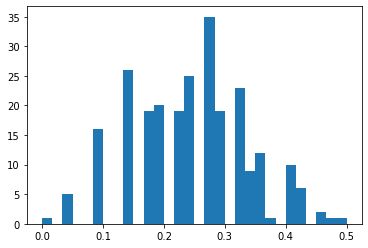

In [126]:
# X is not relevant here since it's not used by the dummy classifier
X = lab[["valence", "arounsal"]]
dummy_clf = DummyClassifier(strategy="uniform")
n_splits = 5
kfold = KFold(n_splits=n_splits)
scores = np.empty([n_splits, 50])
for j in range(50):
    for i, (train, test) in enumerate(kfold.split(X)):
        dummy_clf.fit(X.iloc[train, :], subject_assigned_category[train])
        scores[i, j] = dummy_clf.score(X.iloc[test, :], subject_assigned_category[test])

plt.figure()
plt.hist(scores.flatten(), bins=30)
CI95 = np.percentile(scores.flatten(), [2.5, 97.5])
print("the 95% CI of the accuracy is: {:.2f}, {:.2f}".format(CI95[0], CI95[1]))

As an alternative the probability of correct responses under the chance model can be calculated from the labels distribution (see the code). The standard error of these estimates are given $\sqrt{\frac{p(1-p)}{N}}$, where N is the number of samples used to estimate $p$, in our case given by the number of samples in each CV split.

In [131]:
p = max(p_subject_category)
p = np.sum(p_subject_category * p_subject_category)
# number of samples in each CV split
N = int(len(lab)/n_splits)
p_SE = np.sqrt(p*(1-p)/N)
print("the 95% CI of the accuracy is: {:.2f}, {:.2f}".format(p-2*p_SE, p+2*p_SE))

the 95% CI of the accuracy is: 0.07, 0.45
